# 머신러닝
- 머신 러닝
- 회귀 예측

## 머신러닝 

- 학습 (train) : 지도 학습 

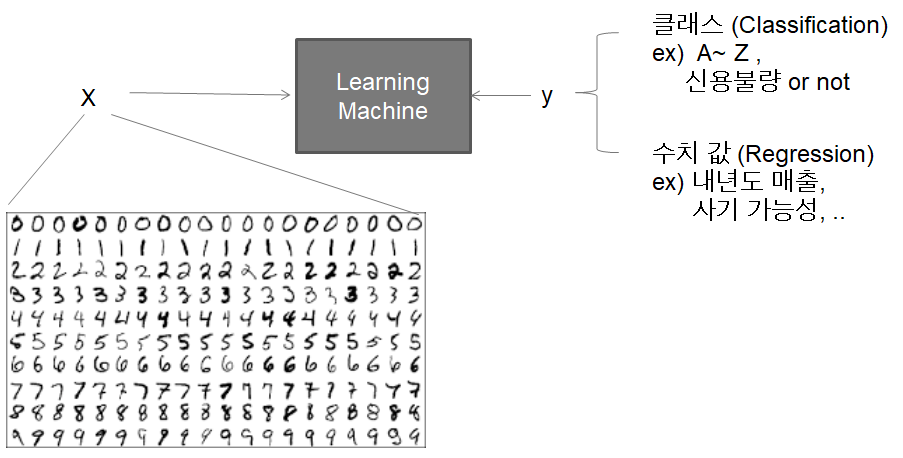
- 활용 (test)

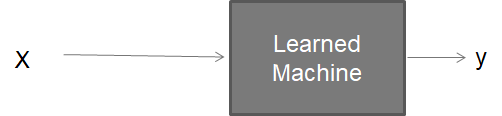

- machine learning 개발 과정

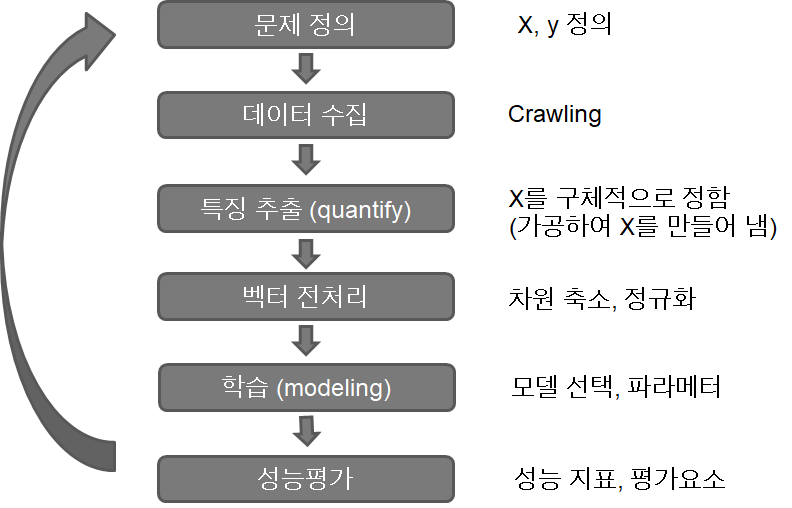


- 수치화 (quantify)

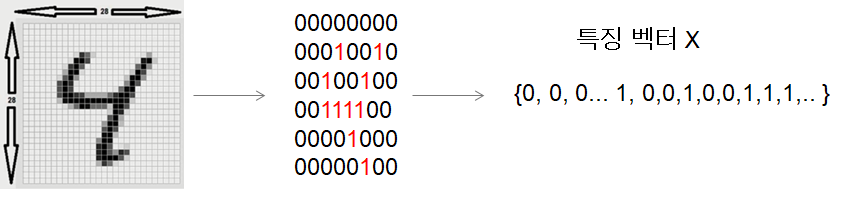

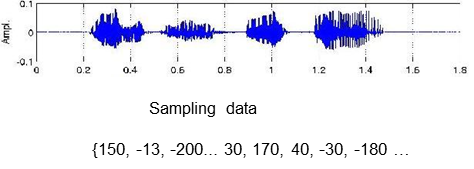

## regression (회귀 예측)

### 선형 회귀 모델 


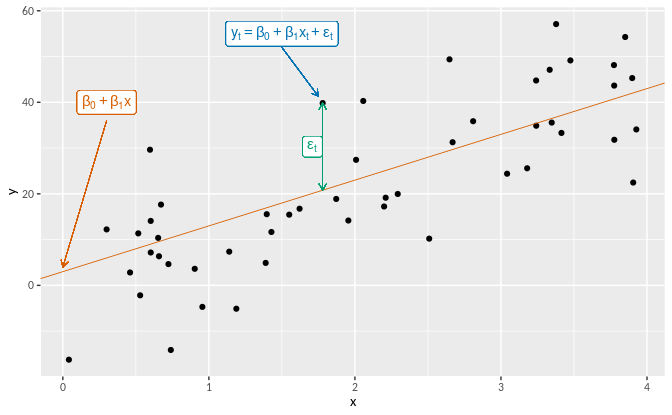

In [5]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

### - 머신러닝 패키지 sklearn 설치

In [1]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2935 sha256=7a8d09263def378822eed870c17ae81bc112972d5a4e56b503dd15baaf0743da
  Stored in directory: /Users/siyeonson/Library/Caches/pip/wheels/03/8b/6f/9f13c705de81a6b351b718b3cf917e41ad7c0933c8630d4dd4
Successfully built sklearn


---

## 집값 예측

## 1) 데이터 수집

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## 2) 데이터 준비 및 탐색

- housing.DESCR : 데이터 설명
- housing.data : X 데이터
- housing.feature_names: X 데이터 feature names
- housing.target : y 데이터


In [6]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)  # 데이터 가공
df.head()  # 상위 5개를 출력

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
df['PRICE'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- dataframe.shape : 보편적 데이터 형태 조회

In [9]:
print('주택 가격 데이터 형태 : ', df.shape)

 주택 가격 데이터 형태 :  (20640, 9)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 3) 모델 training

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
# X, Y 분할하기
Y = df['PRICE']
X = df.drop(['PRICE'], axis=1, inplace=False)

print(X.shape, Y.shape)

(20640, 8) (20640,)


In [13]:
Y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

- train_test_split (X, Y, test_size=비율, random_state= 결과재현을 위한 random seed고정)

In [14]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

print(X_train.shape)
print(Y_train.shape)
print(Y_train)  # row index, Y value 

(14448, 8)
(14448,)
10954    2.355
2538     0.600
5118     0.990
3269     1.406
13144    1.368
         ...  
1099     0.938
18898    1.031
11798    1.926
6637     1.535
2575     0.811
Name: PRICE, Length: 14448, dtype: float64


In [15]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [16]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)
Y_predict

array([2.81219561, 1.26208993, 1.43568493, ..., 1.82811758, 2.35080185,
       2.49388055])

## 4) 결과 분석 

### regression  모델 정보

In [18]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))
print(df.head())

Y 절편 값:  -35.70396107929864
회귀 계수 값:  [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [27]:
coef = pd.Series(data=lr.coef_, index=X.columns)

print(coef)  # 회귀 계수(가중치, 기울기)

MedInc        0.442798
HouseAge      0.009073
AveRooms     -0.115072
AveBedrms     0.611526
Population   -0.000004
AveOccup     -0.003927
Latitude     -0.407213
Longitude    -0.420488
dtype: float64


## regression 성능 지표
### 1) mean squared error

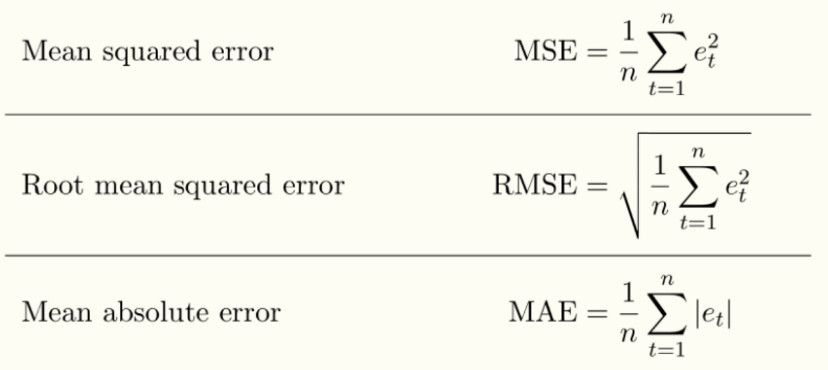

In [20]:
print(Y_predict)
print(Y_test)

[2.81219561 1.26208993 1.43568493 ... 1.82811758 2.35080185 2.49388055]
10385    2.78700
1943     2.07600
7490     0.96700
16889    3.53800
11416    3.90500
          ...   
16911    5.00001
15066    1.12500
19410    1.74100
10126    2.27000
18568    1.94500
Name: PRICE, Length: 6192, dtype: float64


In [21]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
# 오차가 0.734(rmse) 정도 됨

MSE : 0.539, RMSE : 0.734


### 2) correlation(상관계수)

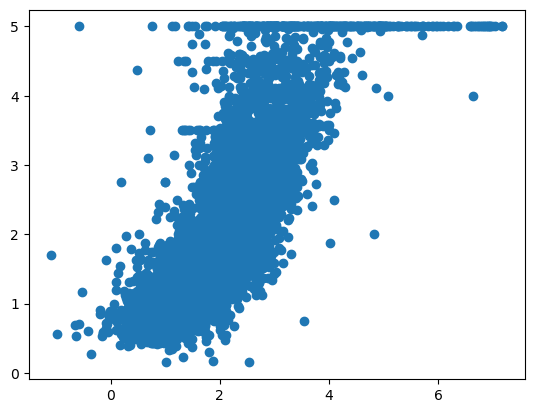

In [22]:
import matplotlib.pyplot as plt
plt.scatter(Y_predict, Y_test)

In [23]:
import scipy.stats as stats
print(stats.pearsonr(Y_test, Y_predict))
# 상관계수는 0.77

PearsonRResult(statistic=0.7756332795047762, pvalue=0.0)


## coef 구하는 방법 :  경사하강법
- 오차를 최소화하는 a값을 찾음
    - brute force
    - 경사 하강법 : a 값을 활용하면서 최적 a를 찾음

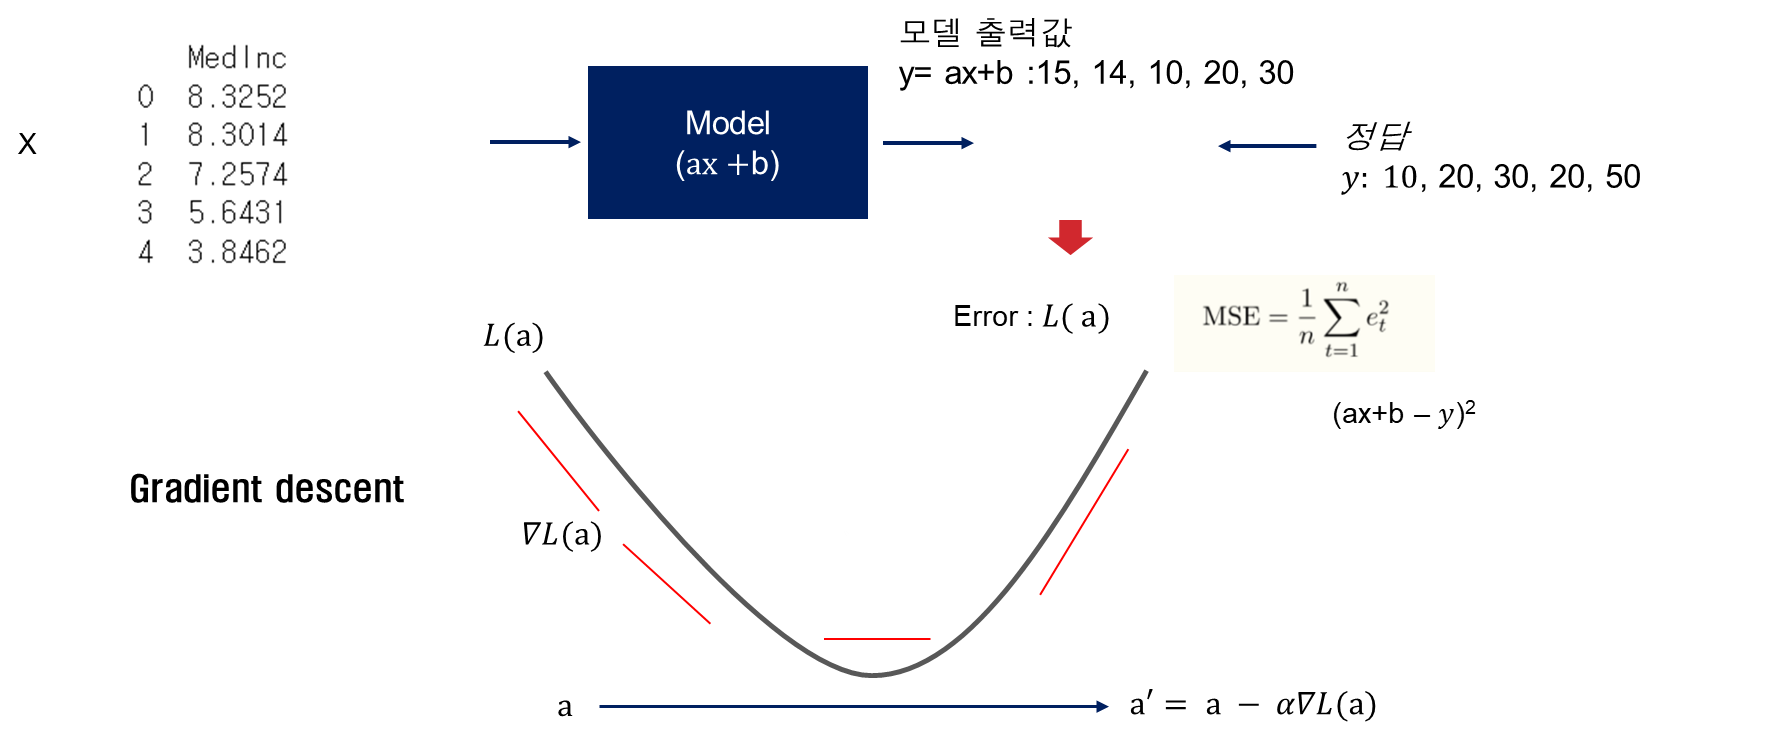

### 신경망, 딥러닝

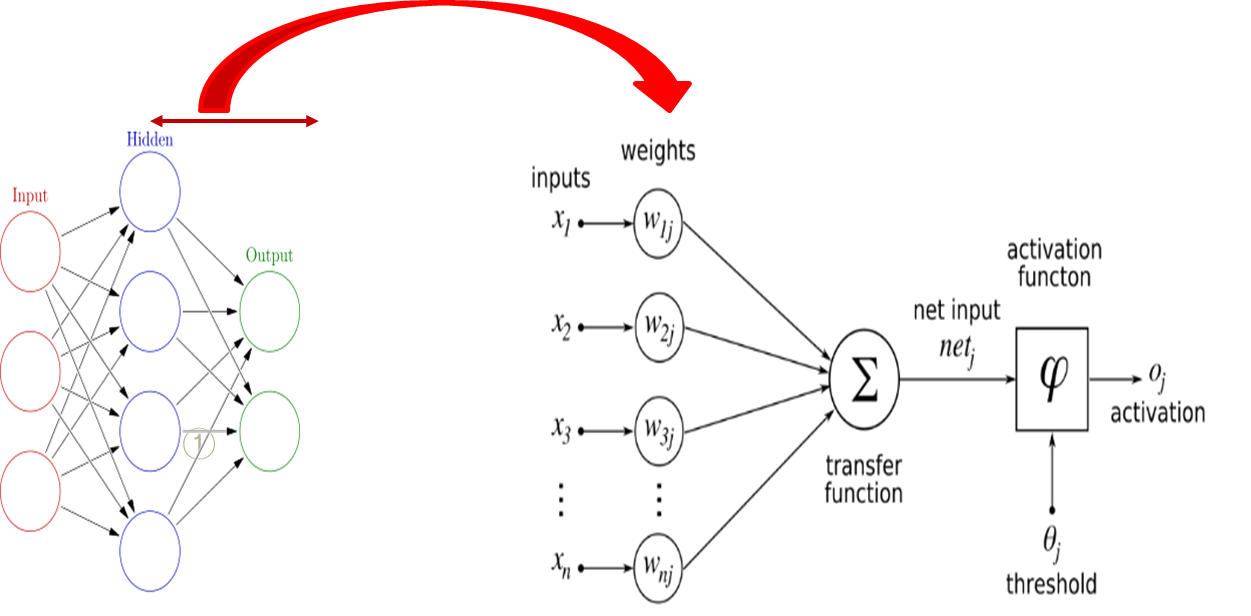

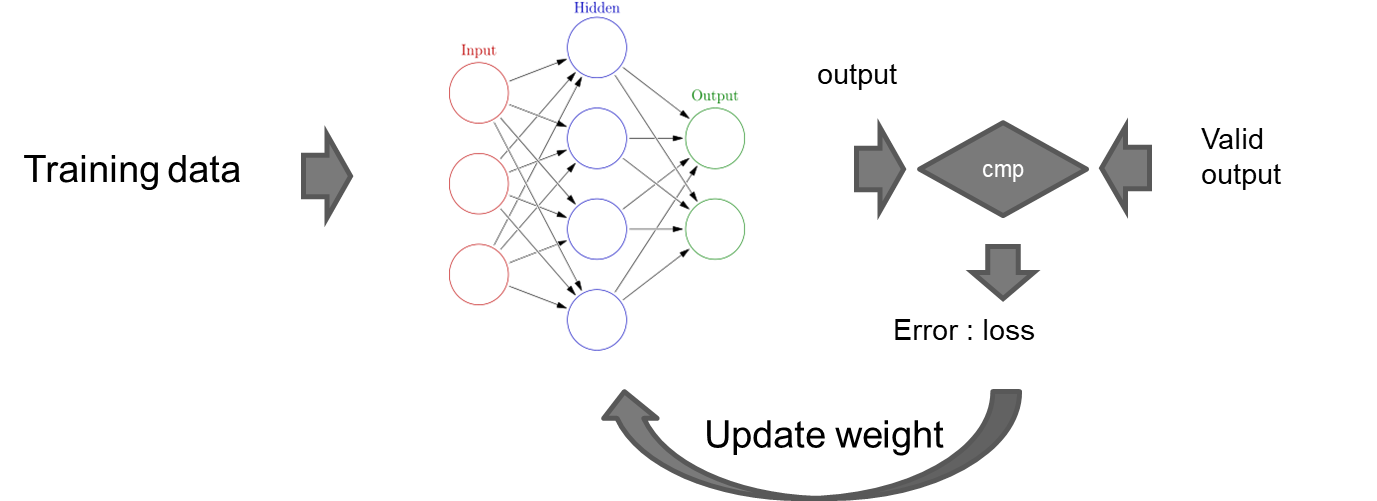

## 5)  시각화하기

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

- sns.regplot( x= X column, y= Y column, data= 데이터)

<Axes: xlabel='HouseAge', ylabel='PRICE'>

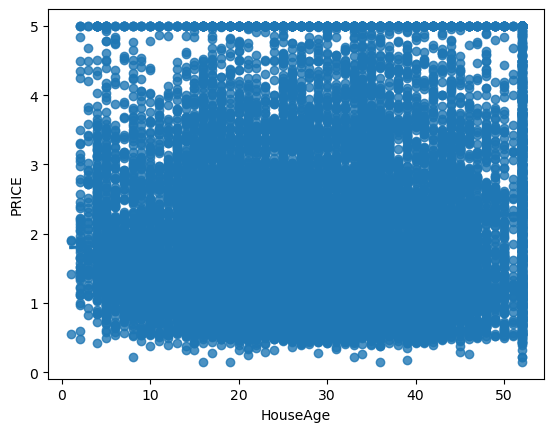

In [26]:
sns.regplot(x='HouseAge', y='PRICE', data= df)

- fig, axs = plt.subplots( figsize=(x크기, y크기), ncols= x칸, nrows=y칸)
- sns.regplot (  ....,  ax=axs[row][col]) 

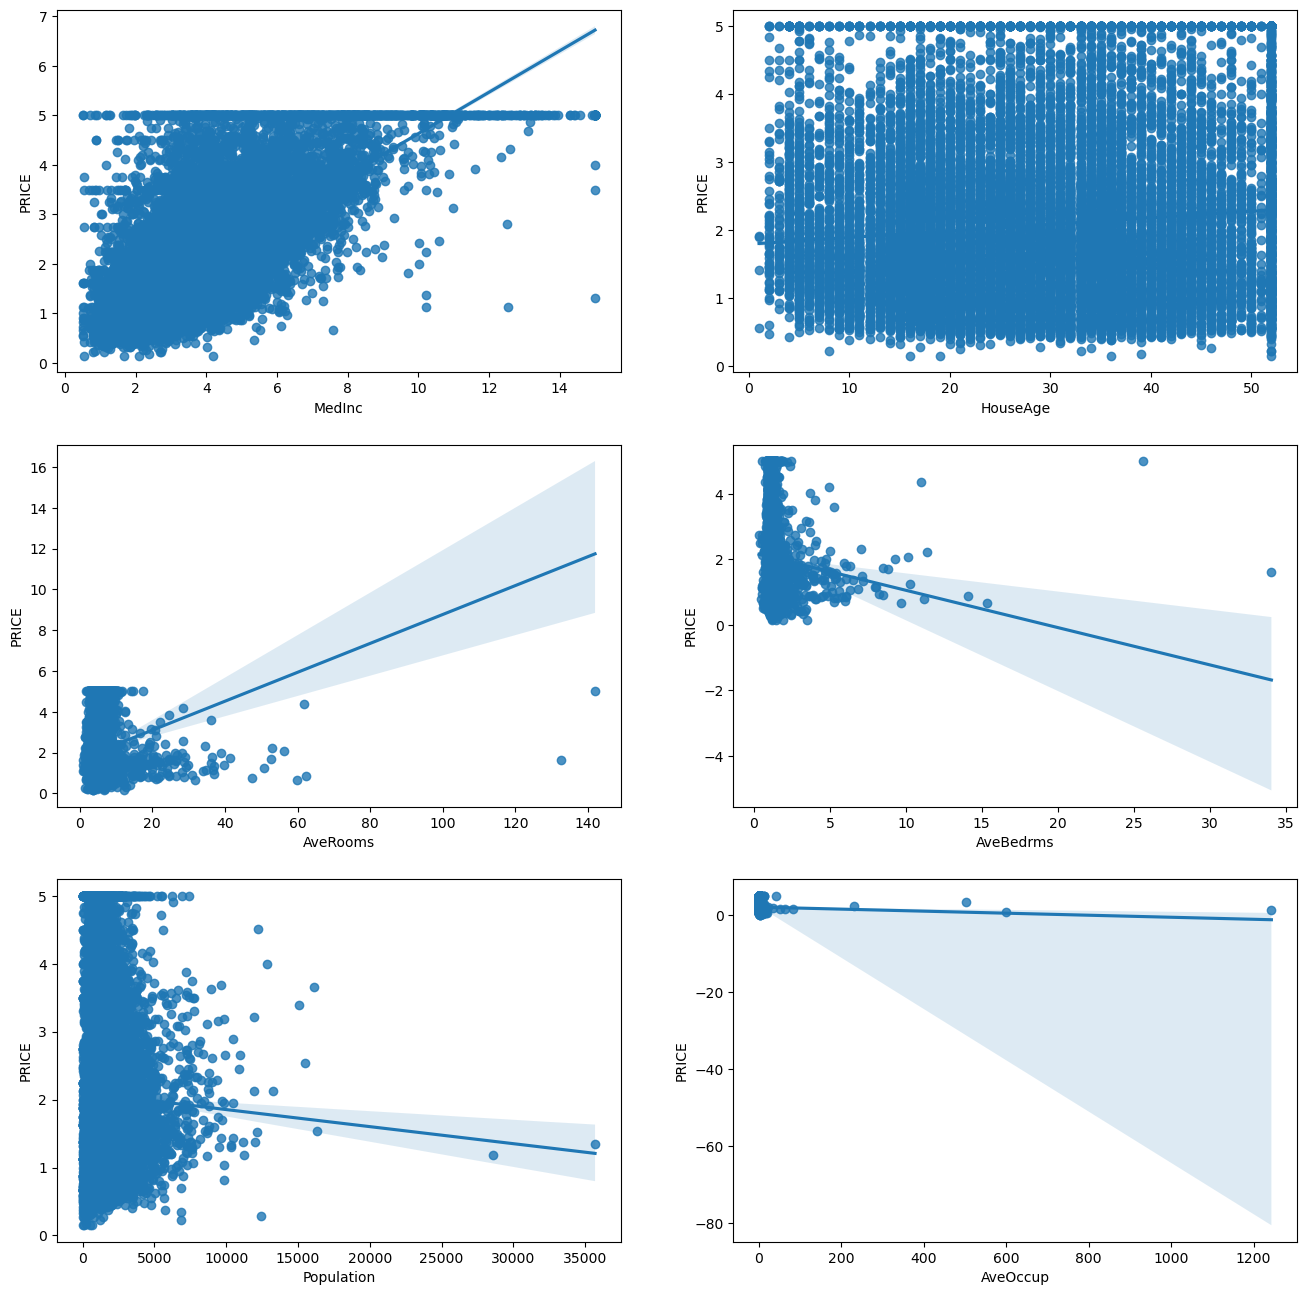

In [29]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=2, nrows=3)

x_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for i, feature in enumerate(x_features):
      row = int(i/2)
      col = i%2

      sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

## 과제1 : 전체 변수로 부터  MedIncome을 예측하는 모델을 만들고, 예측 결과의 상관계수를 계산하시오 

In [135]:
## 1) 데이터 가공
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)


## 2) 모델 training
from sklearn.model_selection import train_test_split

## 2.1) X, Y 분할하기
Y = df['MedInc']
X = df.drop(['MedInc'], axis=1, inplace=False)

## 2.2) 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)


## 3) 선형 회귀 분석
from sklearn.linear_model import LinearRegression

## 3.1) 모델 생성
lr = LinearRegression()

## 3.2) 모델 훈련
lr.fit(X_train, Y_train)

## 3.3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)
Y_predict


## 4) 결과 분석
## 4.1) regression 모델 정보
# print('Y 절편 값: ', lr.intercept_)
# print('회귀 계수 값: ', np.round(lr.coef_, 1))


## 5) 성능 분석
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

# print('MSE : {0:.3f}' .format(mean_squared_error(Y_test, Y_predict)))
print('상관계수 : {0:.3f}' .format(stats.pearsonr(Y_test, Y_predict).statistic))

상관계수 : 0.735


--- 

# 자동차연비 예측

## 1) 데이터 수집

https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [5]:
import numpy as np
import pandas as pd 

data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')

## 2) 데이터 준비 및 탐색

In [6]:
print('데이터셋 크기 : ', data_df.shape)

data_df

데이터셋 크기 :  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [234]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### 분석하지 않을 변수 제외하기
- 연비에 영향을 미치지 않는 변수들
    - car_name : string
    - origin : 명목변수(크기가 의미가 없음)

In [7]:
#data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)
data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)

In [236]:
data_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82
394,44.0,4,97.0,52,2130,24.6,82
395,32.0,4,135.0,84,2295,11.6,82
396,28.0,4,120.0,79,2625,18.6,82


- 결측치 처리

In [164]:
# error 남
data_df.horsepower= data_df.horsepower.astype('int')

ValueError: invalid literal for int() with base 10: '?'

In [237]:
# data_df['horsepower']=='?'
data_df[data_df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


- 결측치 처리 : horsepower , "?" 라는 값이 있어서 object로 처리됨
    - 결측치로 마킹 :  replace ('?', NaN)
    - record 전체를 날리거나, 대체값 넣어주기 : dropna, fillna

In [8]:
data_df.horsepower=data_df.horsepower.replace('?', np.NaN)
print(data_df.shape)
data_df.info()

(398, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [9]:
data_df=data_df.dropna()
print(data_df.shape)
data_df.info()

(392, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


In [240]:
data_df.horsepower= data_df.horsepower.astype('int')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 24.5 KB


## 3) 모델 training

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# X, Y 분할하기

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

In [12]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [13]:
print(X_train.shape)

(313, 6)


In [15]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [16]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

## 4) 결과 분석 및 시각화

In [248]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 4))

Y 절편 값:  -16.37
회귀 계수 값:  [ 0.0521  0.0054  0.0073 -0.0074  0.1722  0.7483]


In [177]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
# coef.sort_values(ascending=False)
coef

cylinders       0.05
displacement    0.01
horsepower      0.01
weight         -0.01
acceleration    0.17
model_year      0.75
dtype: float64

In [141]:
print(Y_predict)

[26.78787681 24.65755055 27.69305563 30.62473176 32.18105024 31.81547388
 28.54444122 25.76507547 19.57750163 15.24476676 29.66134725 19.96439715
 32.52742688 22.14543667 24.86010153 21.68720205 29.30024604 17.43213256
 26.68396515 20.28883935 11.46660455 30.56819076 21.01960865  8.49008012
 26.84553659 20.48648686 20.648893   21.45649391 11.69290184 15.43436575
 27.23849412 34.84527204 10.61377264 16.50191558 31.09582997 28.91001112
  7.59235482 28.57878647 29.15386405 26.31938917 29.83148425 20.97199567
 22.1414744  13.93370398 30.4123222  20.64015571 26.84589208 23.24759855
 26.47730052 17.06886798 28.20763918 25.35087776 10.3342306  25.71709422
 28.09828983 15.28850024 24.65175804 34.24319787 31.28581821 26.06275048
 13.86333918 25.34054683  9.27249494 31.30500471 22.0260349  21.17188213
 16.94077315 10.67783888 28.53291704 20.93266277 30.47347114  6.67671811
 30.51137396 21.51238653 28.58634535 28.59316891 15.20173985 24.5124658
 35.05683636 22.8335566  26.57165489 15.2575291  21.

In [142]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

MSE : 11.423, RMSE : 3.380


In [89]:
print(X_test)

       HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
10385      15.0  7.527559   1.049869      2529.0  3.318898     33.60   
1943       12.0  6.330084   1.041783      2033.0  2.831476     38.62   
7490       35.0  5.369159   1.294393       909.0  4.247664     33.93   
16889      39.0  4.173405   1.074573      2156.0  1.937107     37.59   
11416      16.0  8.602349   1.058725      2142.0  3.593960     33.70   
...         ...       ...        ...         ...       ...       ...   
16911      21.0  8.497636   1.033097      2440.0  2.884161     37.56   
15066      19.0  4.083499   1.094433      2971.0  2.953280     32.79   
19410      25.0  7.230216   1.143885       390.0  2.805755     37.70   
10126      20.0  4.961481   1.014815      1822.0  2.699259     33.94   
18568      48.0  4.988920   0.977839      1071.0  2.966759     36.92   

       Longitude  
10385    -117.65  
1943     -120.91  
7490     -118.23  
16889    -122.37  
11416    -117.98  
...          ...  
16

### - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

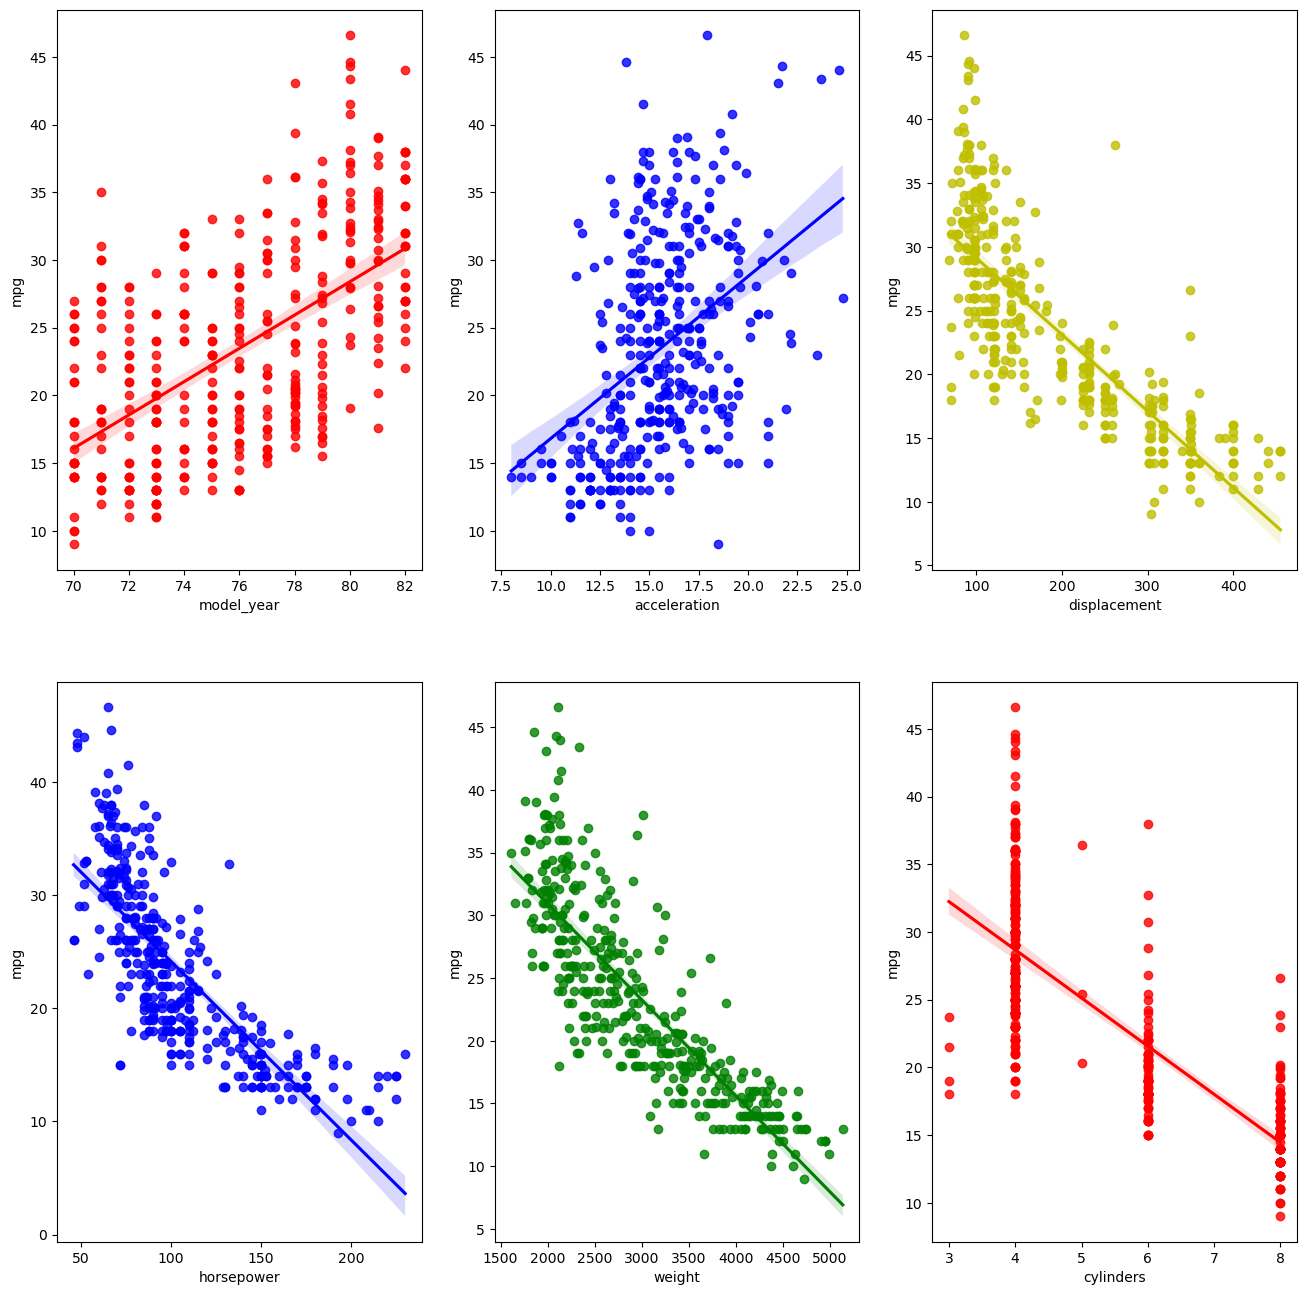

In [250]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'horsepower','weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'b','g', 'r']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

## 과제2 : horsepower를 1/10 로 줄이고, 회귀계수가 어떻게 변하는지 본다. 

In [262]:
## 1) 데이터 가공
import numpy as np
import pandas as pd 

data_df1 = pd.read_csv('auto-mpg.csv', header=0, engine='python')
data_df1 = data_df1.drop(['car_name', 'origin'], axis=1, inplace=False)
data_df1.horsepower=data_df1.horsepower.replace('?', np.NaN)
data_df1 = data_df1.dropna()
data_df1.horsepower= data_df1.horsepower.astype('int')

data_df1['h10']= data_df1['horsepower']/10
X = data_df1.drop(['horsepower'], axis=1, inplace=False)


## 2) 모델 training
from sklearn.model_selection import train_test_split

## 2.1) X, Y 분할하기
Y = X['mpg']
X = X.drop(['mpg'], axis=1, inplace=False)


## 2.2) 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


## 3) 선형 회귀 분석
from sklearn.linear_model import LinearRegression

## 3.1) 모델 생성
lr = LinearRegression()

## 3.2) 모델 훈련
lr.fit(X_train, Y_train)

## 3.3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)
Y_predict


## 4) 결과 분석
## 4.1) regression 모델 정보
coef = pd.Series(data=np.round(lr.coef_, 5), index=X.columns)
print(coef)  # 회귀 계수

## 0.01에서 0.07로 변경됨

cylinders       0.05211
displacement    0.00537
weight         -0.00736
acceleration    0.17219
model_year      0.74831
h10             0.07280
dtype: float64


###   <<<< 연비 예측하기  >>>>

In [178]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders (%d ~ %d): "%(data_df['cylinders'].min(), data_df['cylinders'].max())))
displacement_1 = int(input("displacement (%d ~ %d): "%(data_df['displacement'].min(), data_df['displacement'].max())))
horsepower_1=int(input("horsepower (%d ~ %d): "%(data_df['horsepower'].min(), data_df['horsepower'].max())))
weight_1 = int(input("weight (%f ~ %f): "%(data_df['weight'].min(), data_df['weight'].max())))
acceleration_1 = int(input("acceleration (%f ~ %f): "%(data_df['acceleration'].min(), data_df['acceleration'].max())))
model_year_1 = int(input("model_year (%f ~ %f): "%(data_df['model_year'].min(), data_df['model_year'].max())))

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders (3 ~ 8): 3
displacement (68 ~ 455): 69
horsepower (46 ~ 230): 46
weight (1613.000000 ~ 5140.000000): 1666
acceleration (8.000000 ~ 24.800000): 23
model_year (70.000000 ~ 82.000000): 78


In [179]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, horsepower_1, weight_1, acceleration_1 , model_year_1]])

In [180]:
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)

이 자동차의 예상 연비(mpg)는 34.56 입니다.


## 5) 결과 개선 

- 다른 regression model
- parameter tuning 
- feature selection

### 모델 변경
- linear regression

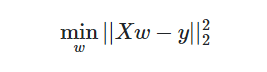
- ridge regression : 계수의 영향력을 줄이기 위함
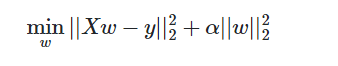

In [187]:
from sklearn import linear_model

models = [ LinearRegression(), linear_model.Ridge(alpha=.5) ]

for m in models:
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print(mse)

11.42292275960248
11.420395258599806


### parameter tuning

In [124]:
for al in range(0, 10):
    m = linear_model.Ridge(alpha=al/float(10)) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print(al/10, mse)

0.0 11.422922759602532
0.1 11.422414521958164
0.2 11.42190765979502
0.3 11.421402166331708
0.4 11.42089803483112
0.5 11.420395258599806
0.6 11.419893830987842
0.7 11.419393745388486
0.8 11.418894995237705
0.9 11.418397574013925


### feature selection

- 사용할 feature 선택
- K-best : feature 중 score가 높은 것 k 개 선택
- transform : k개 만 남기는 걸로 변환

cylinders: 416.958038
displacement: 491.124402
weight: 581.983850
acceleration: 60.060113
model_year: 152.173848
h10: 424.199652


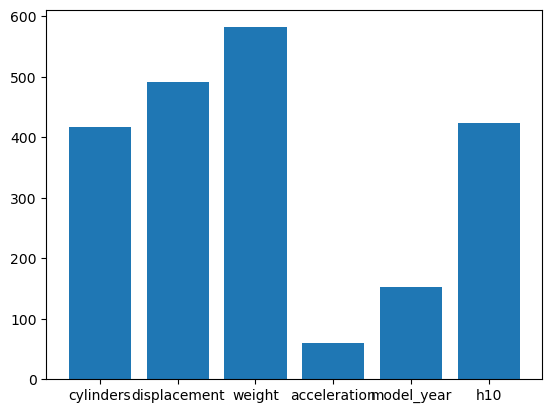

In [188]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test, k):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test,6)

for i in range(len(fs.scores_)):
    print('%s: %f' % (X_test.columns[i], fs.scores_[i]))
# plot the scores
pyplot.bar(X_test.columns, fs.scores_)
pyplot.show()

In [127]:
# 하나씩 늘려가면서 score 보기
for k in range(1,7) :
    X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test, k)

    m = LinearRegression()
    m.fit(X_train_fs, Y_train)
    Y_predict = m.predict(X_test_fs)
    mse = mean_squared_error(Y_test, Y_predict)
    print(k, mse)

1 15.024135734912432
2 14.439655612878212
3 14.172982224226399
4 14.198414336239587
5 11.34572402496689
6 11.42292275960248


## 6) validation, test 

- 파라메터 선택 => 결과에 많은 영향을 줌
- test set을 이용한 파라메터 선택은 test set 에 fit 되었다고 볼 수도 있음
- 해결 방향 : 파라메터 선택을 위한 validation set과, 성능 평가를 위한 test set을 분리



In [189]:
# 6:2:2  split
X_train, X_tv, Y_train, Y_tv = train_test_split(X, Y, test_size=0.4, random_state=1)
X_test, X_validation, Y_test, Y_validation = train_test_split(X_tv, Y_tv, test_size=0.5, random_state=1)
print(X_train.shape, X_validation.shape, X_test.shape)

(235, 6) (79, 6) (78, 6)


In [190]:
# 파라메터 선택 : alpha =0 
for al in range(0, 10):
    m= linear_model.Ridge(alpha=al/10) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_validation)
    # print (Y_validation, Y_predict)
    mse = mean_squared_error(Y_validation, Y_predict)
    print (al/10, mse)

0.0 13.101946217887658
0.1 13.10183410475348
0.2 13.1017226570498
0.3 13.101611871644323
0.4 13.101501745426122
0.5 13.101392275305288
0.6 13.101283458212947
0.7 13.1011752911009
0.8 13.101067770941597
0.9 13.100960894727818


In [ ]:
# test 
m= linear_model.Ridge(alpha=9/float(10)) 
m.fit(X_train, Y_train)
Y_predict= m.predict(X_test)
mse = mean_squared_error(Y_test, Y_predict)
print(mse)

## 7) train, test data 에 따라 달라지는 결과 


In [191]:
for i in range(11, 20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    m = linear_model.Ridge(alpha=9/float(10)) 
    m.fit(X_train, Y_train)
    Y_predict = m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print(mse)

13.614015910499951
16.748905777273553
12.698918223861952
11.833578717562267
14.951011478796723
13.721796050584963
12.253476158984139
11.801767852653509
11.084606126731456


## cross validation

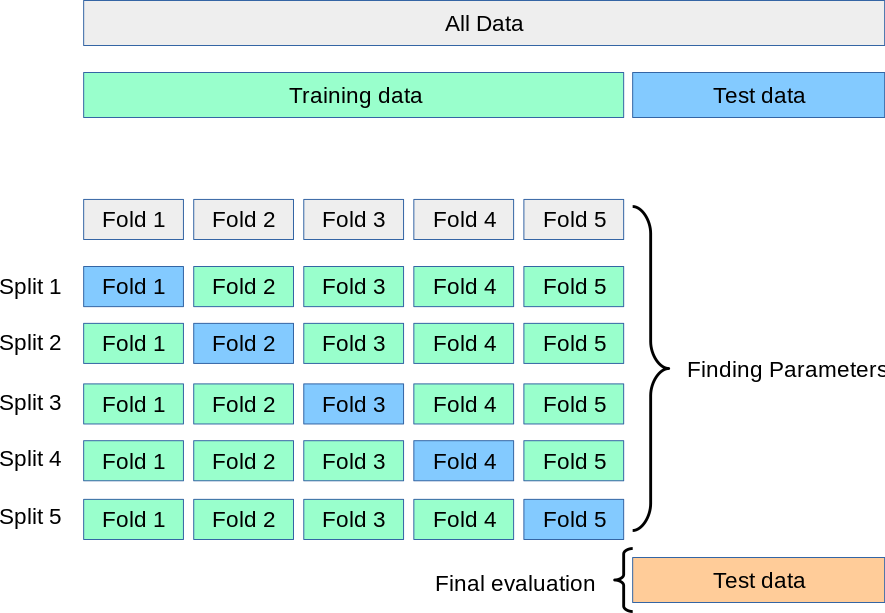

- KFold - 고정 분할

In [129]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, make_scorer

m = linear_model.Ridge(alpha=float(9)/10) 
scores = cross_validate(m, X, Y, cv=5 , scoring=make_scorer(mean_squared_error))

print(scores['test_score'])

[15.60238674 11.4088472   6.30760316 15.2812416  30.76610946]


- KFold - random 추출

In [128]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer

kfold = KFold(n_splits=5, shuffle=True, random_state=1) # shuffle = False 면 고정 추출
scores = cross_val_score(m, X, Y, cv=kfold, scoring=make_scorer(mean_squared_error))

print(scores)

[12.85995766 11.89617024 15.57518061 11.22137669  9.56570817]


## 과제3 : housing data 를  5-fold로 cross validation하여 score를 구하시오

In [260]:
## 1) 데이터 가공
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)


## 2) 모델 training
from sklearn.model_selection import train_test_split

## 2.1) X, Y 분할하기
df["PRICE"] = housing.target
Y = df['PRICE']
X = df.drop(['PRICE'], axis=1, inplace=False)

## 2.2) 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)


## 3) cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer

kfold = KFold(n_splits=5, shuffle=True, random_state=1) # shuffle = False 면 고정 추출
scores = cross_val_score(m, X, Y, cv=kfold, scoring=make_scorer(mean_squared_error))

print(scores)

[0.52914148 0.51265575 0.53910719 0.5061093  0.55086183]
